`The most basic statistical summary of a list of objects or numbers is its distribution.`

`two types of variables: categorical and numeric. Each can be divided into two other groups: categorical can be ordinal or not, whereas numerical variables can be discrete or continuous.`

In [3]:
# When each entry in a vector comes from one of a small number of groups, we refer to the data as categorical data
# Some categorical data can be ordered even if they are not numbers per se, such as spiciness (mild, medium, hot)
# ordered categorical data are referred to as ordinal data

In [4]:
# Keep in mind that discrete numeric data can be considered ordinal

### Casestudy: Visualizing Students' heights

In [5]:
library(tidyverse)
library(dslabs)
data(heights)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'dslabs' was built under R version 3.6.3"

In [6]:
# It turns out that, in some cases, the average and the standard deviation are pretty much all we need to understand the data

In [8]:
# Below techniques will serve as an alternative for when two numbers (SD and mean) are not enough

In [10]:
# The most basic statistical summary of a list of objects or numbers is its distribution.
# Example
#> 
#> Female   Male 
#>  0.227  0.773
# above two categry distribution is most simple, it doesnt warrants visualizing


# other example
![](https://rafalab.github.io/dsbook/book_files/figure-html/state-region-distribution-1.png)

`barplot was used to describe the distribution, useful alternative to a frequency table`
**All Categorical data can use above techniques**

<span class = "text text-danger"><strong>When the data is numerical, the task of displaying distributions is more challenging</strong></span>



# Similar to what the frequency table does for categorical data, the CDF (Cumulative Distribution Function) defines the distribution for numerical data

```
F(a)=Pr(x≤a)
```
![](https://rafalab.github.io/dsbook/book_files/figure-html/ecdf-1.png)
`the CDF concept is widely discussed in statistics textbooks, the plot is actually not very popular in practice. The main reason is that it does not easily convey characteristics of interest such as: at what value is the distribution centered? Is the distribution symmetric? What ranges contain 95% of the values? Histograms are much preferred because they greatly facilitate answering such questions`

# HISTOGRAM
# The simplest way to make a histogram is to divide the span of our data into non-overlapping bins of the same size. 
# Then, for each bin, we count the number of values that fall in that interval.
![](https://rafalab.github.io/dsbook/book_files/figure-html/height-histogram-1.png)

# Smooth density plot
`Smooth density plots are aesthetically more appealing than histograms`

[As known as Kernel Density Plots, Density Trace Graph.](https://datavizcatalogue.com/methods/density_plot.html#:~:text=A%20Density%20Plot%20visualises%20the,by%20smoothing%20out%20the%20noise.)
```
A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval
```
![](https://rafalab.github.io/dsbook/book_files/figure-html/example-of-smoothed-density-1.png)

In [15]:
# the scale of the y-axis changed from counts to density

In [16]:
# While the histogram is an assumption-free summary, the smoothed density is based on some assumptions

#  Checking the distribution of your variables one by one is probably the first task you should do when you get a new dataset
![](https://www.data-to-viz.com/graph/density_files/figure-html/unnamed-chunk-2-1.png)
`plot this for 2 or 3 but not more variables to do comparisions`
![](https://rafalab.github.io/dsbook/book_files/figure-html/two-densities-one-plot-1.png)

## Normal Distribution is another way to describe, it is perhaps the most important distribution
Here is what the normal distribution looks like when the average is 0 and the SD is 1
![](https://rafalab.github.io/dsbook/book_files/figure-html/normal-distribution-density-1.png)
`The distribution is symmetric, centered at the average, and most values (about 95%) are within 2 SDs from the average`
`The fact that the distribution is defined by just two parameters implies that if a dataset is approximated by a normal distribution, all the information needed to describe the distribution can be encoded in just two numbers: the average and the standard deviation`

In [21]:
# For data that is approximately normally distributed, it is convenient to think in terms of standard units. 
# The standard unit of a value tells us how many standard deviations away from the average it is
# standard units of x,  as z = (x - m)/s, s is sd and m is mean

In [26]:
# caluclating standard units
library(magrittr)
# height  <- heights %$% height
# or use this
height <- heights %>% pull(height)
head(height)

[1] 75 70 68 74 61 65

In [31]:
z = scale(height)
head(z)
# to see how many men are within 2 SDs from the average, we simply type

mean(abs(z) < 2)

1.63707127
0.41116552
-0.07919678
1.39189012
-1.79546483
-0.81474023


[1] 0.9466667

In [34]:
# A systematic way to assess how well the normal distribution fits the data is to check 
# if the observed and predicted proportions match. 
# In general, this is the approach of the quantile-quantile plot (QQ-plot
# dnorm: density function of the normal distribution
# pnorm: cumulative density function of the normal distribution
# qnorm: quantile function of the normal distribution
# rnorm: random sampling from the normal distribution

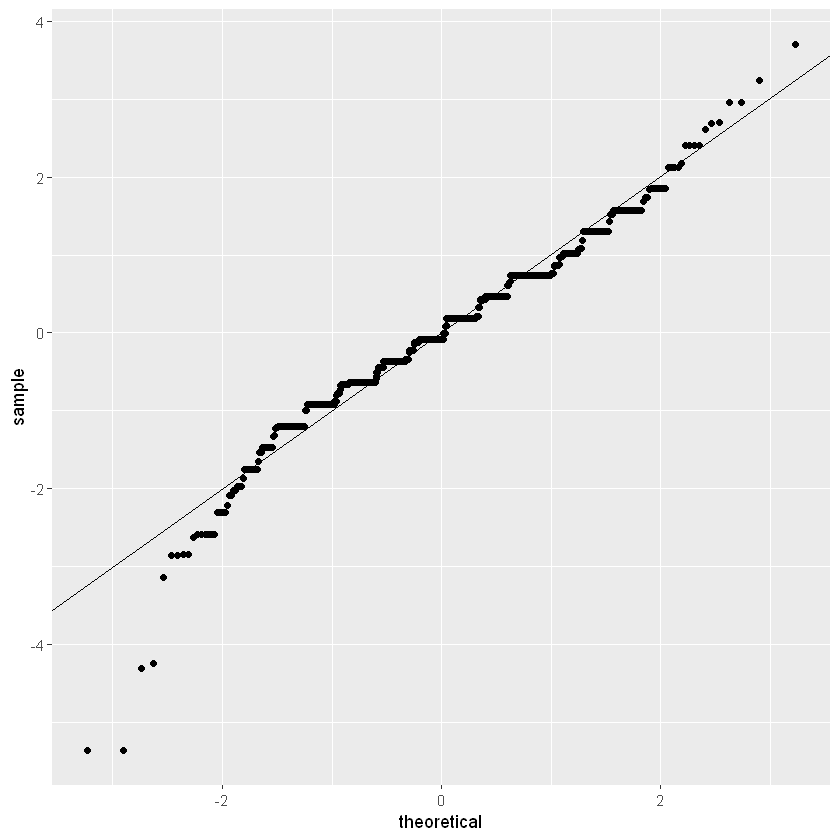

In [36]:
# A systematic way to assess how well the normal distribution fits the 
# data is to check if the observed and predicted proportions match. 
# In general, this is the approach of the quantile-quantile plot 
# The idea of a QQ-plot is that if your data is well approximated by normal distribution then 
# the quantiles of your data should be similar to the quantiles of a normal distribution
heights %>% filter(sex == "Male") %>%
  ggplot(aes(sample = scale(height))) + 
  geom_qq() +
  geom_abline()

Percentiles and Quartiles special cases of Quantiles. lower, median and upper quariles for 25, 50, 75 percentiles respectively.
Also Median is 50 percentile, for normal distribution, median is = average

# For any new data, check if normal distribution applies there by plotting QQplot and Histogram, if not applied, than give them histogram or special density function as results. If asked for numbers given them boxplots or whiskers plots

### Boxplot
![](https://rafalab.github.io/dsbook/book_files/figure-html/first-boxplot-1.png)
`the box is defined by the 25% and 75% percentile and the whiskers showing the range. The distance between these two is called the interquartile range. The two points are outliers according to Tukey’s definition. The median is shown with a horizontal line. Today, we call these boxplots`

Outliers can be also caused by wrong data entry


**Stratification**: In data analysis we often divide observations into groups based on the values of one or more variables associated with those observations. For example in the next section we divide the height values into groups based on a sex variable: females and males.

Stratification is common in data visualization because we are often interested in how the distribution of variables differs across different subgroup


## ggplot2 geometries

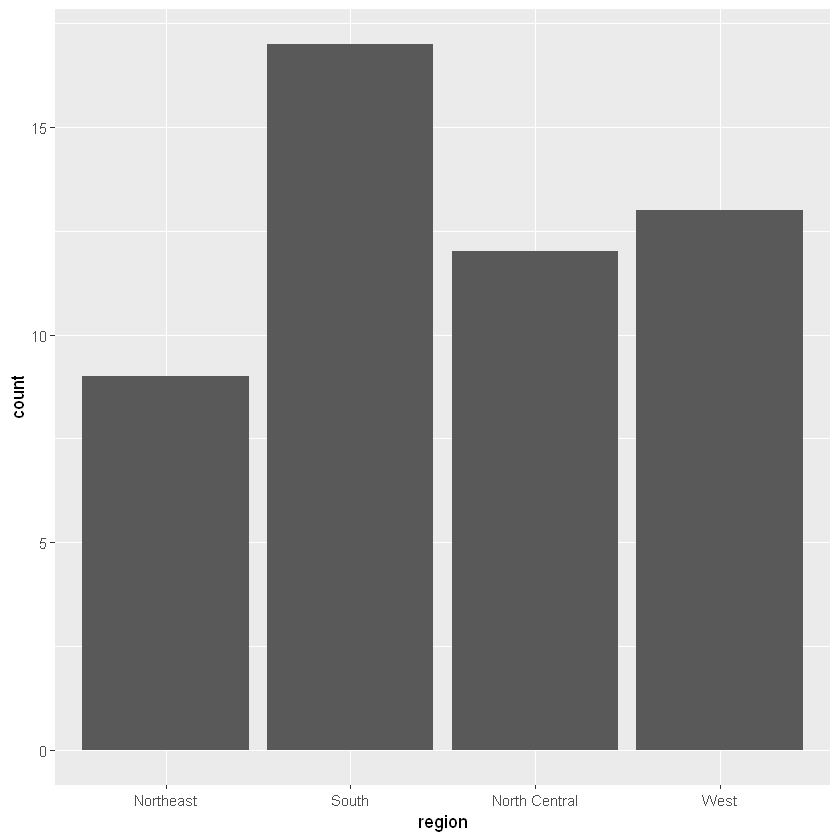

In [39]:
# barplots
murders %>% ggplot(aes(region)) + geom_bar()

In [43]:
# in proportions

tab <- murders %>% 
  count(region) %>% 
  mutate(proportion = n/sum(n))
tab

region,n,proportion
<fct>,<int>,<dbl>
Northeast,9,0.1764706
South,17,0.3333333
North Central,12,0.2352941
West,13,0.2549020


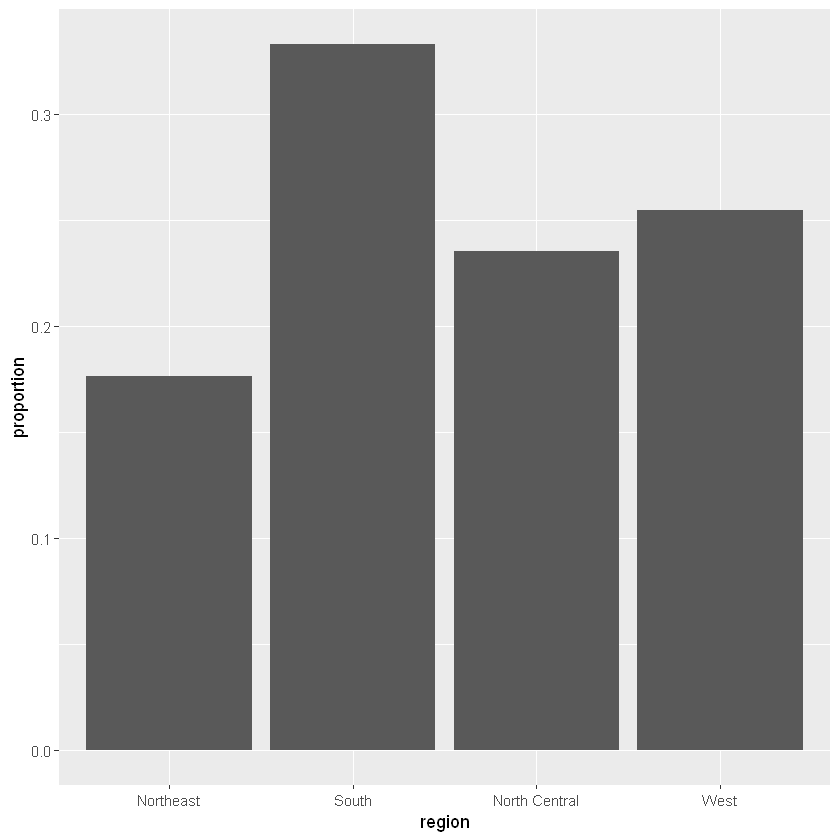

In [44]:
# replotting
tab %>% ggplot(aes(region, proportion)) + geom_bar(stat = "identity")

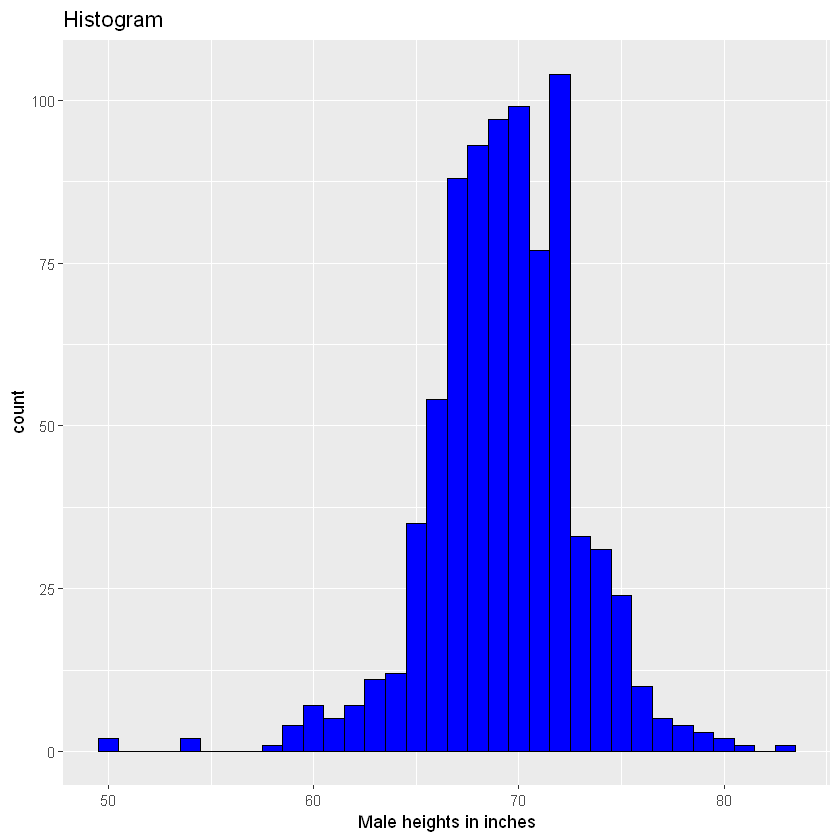

In [49]:
# Histogram
heights %>% 
  filter(sex == "Male") %>% 
  ggplot(aes(height)) +
  geom_histogram(binwidth = 1, fill = "blue", col = "black") +
  xlab("Male heights in inches") + 
  ggtitle("Histogram")

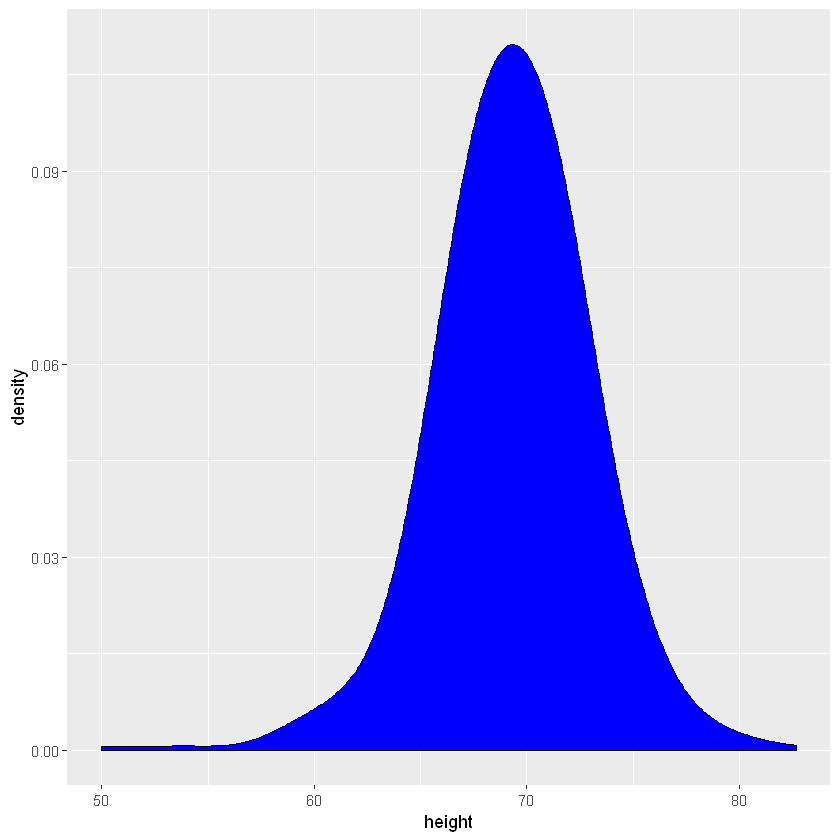

In [53]:
# Smooth Density plot or just Density plot
heights %>% 
  filter(sex == "Male") %>%
  ggplot(aes(height)) +
  geom_density(fill="blue", adjust = 2) # adjust changes the smoothness of the curve

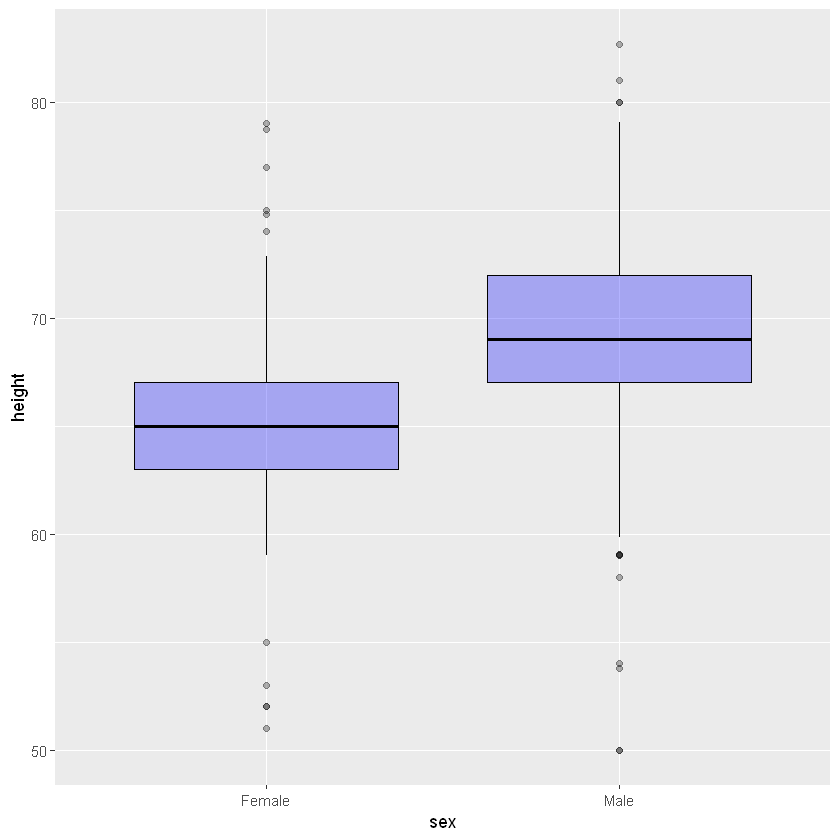

In [57]:
#box-plots
heights %>% 
    ggplot() +
    geom_boxplot(aes(x=sex, y = height), fill="blue", col="black", alpha = 0.3)

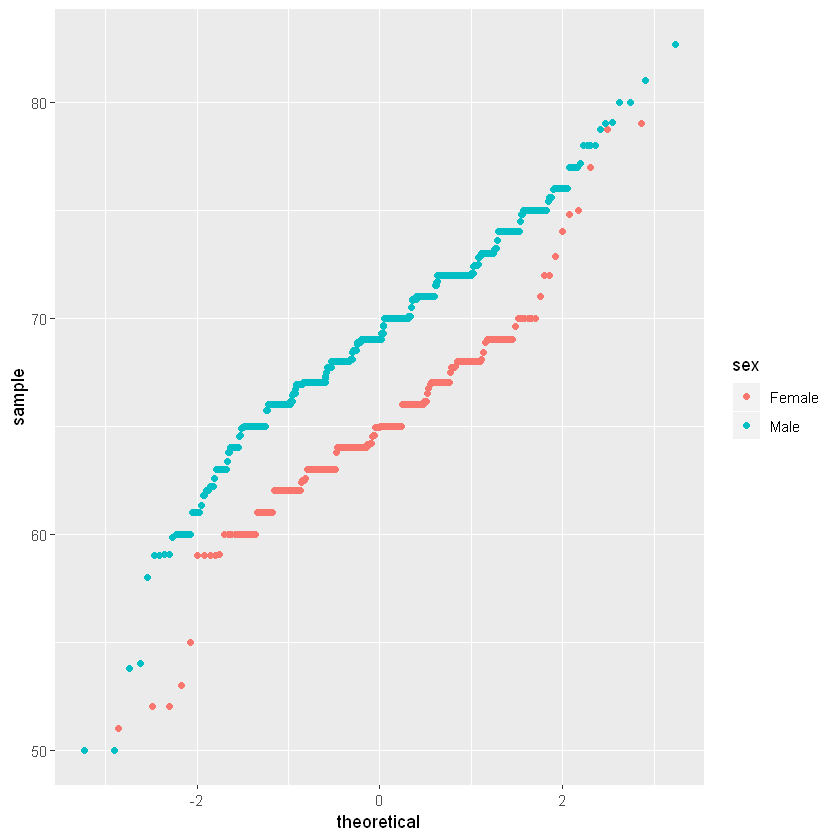

In [66]:
# qq-plots
heights %>%
  ggplot(aes(sample = height, colour = sex)) +
  geom_qq()

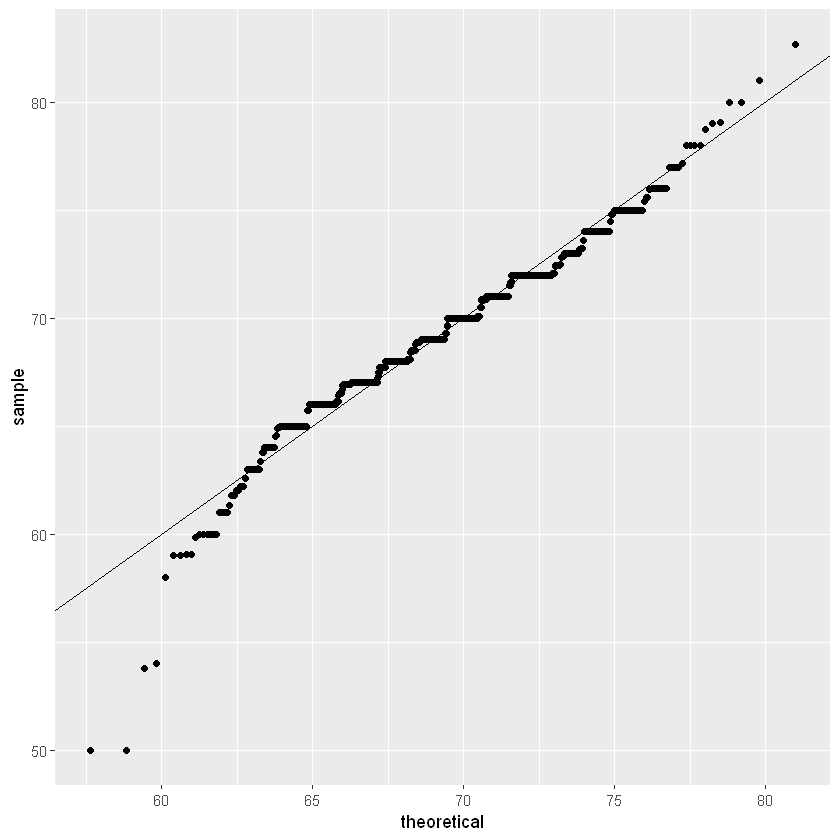

In [68]:
# By default, the sample variable is compared to a normal distribution with average 0 and standard deviation 1. 
# To change this, we use the dparams arguments
params <- heights %>% filter(sex=="Male") %>%
  summarize(mean = mean(height), sd = sd(height))

heights %>% filter(sex=="Male") %>%
  ggplot(aes(sample = height)) +
  geom_qq(dparams = params) +
  geom_abline()

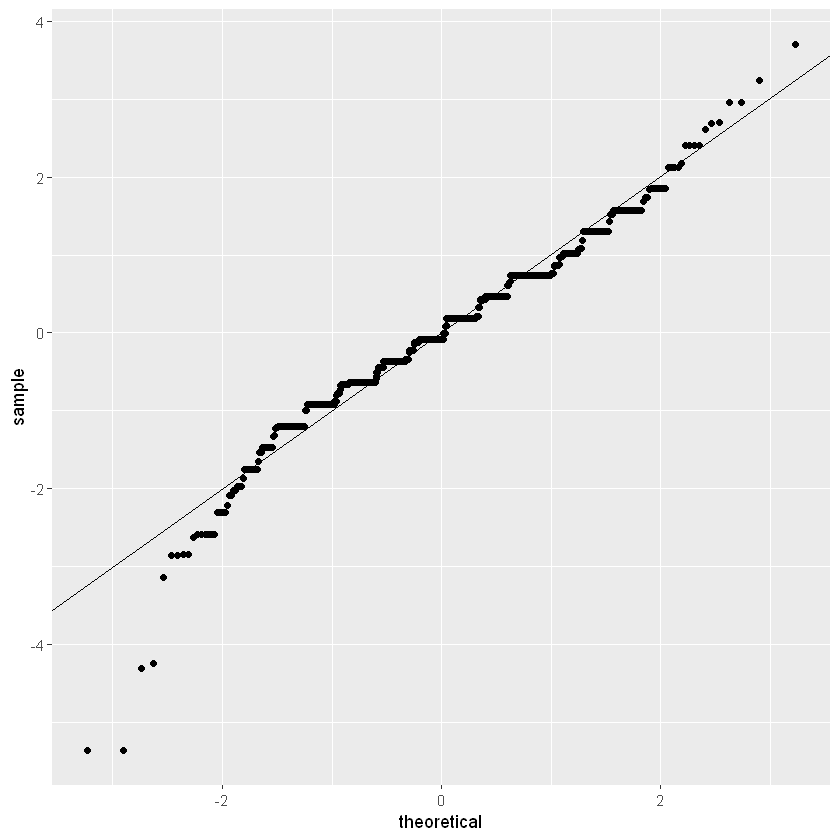

In [71]:
# Another option here is to scale the data first and then make a qqplot against the standard normal
heights %>% 
  filter(sex=="Male") %>%
  ggplot(aes(sample = scale(height))) + 
  geom_qq() +
  geom_abline()

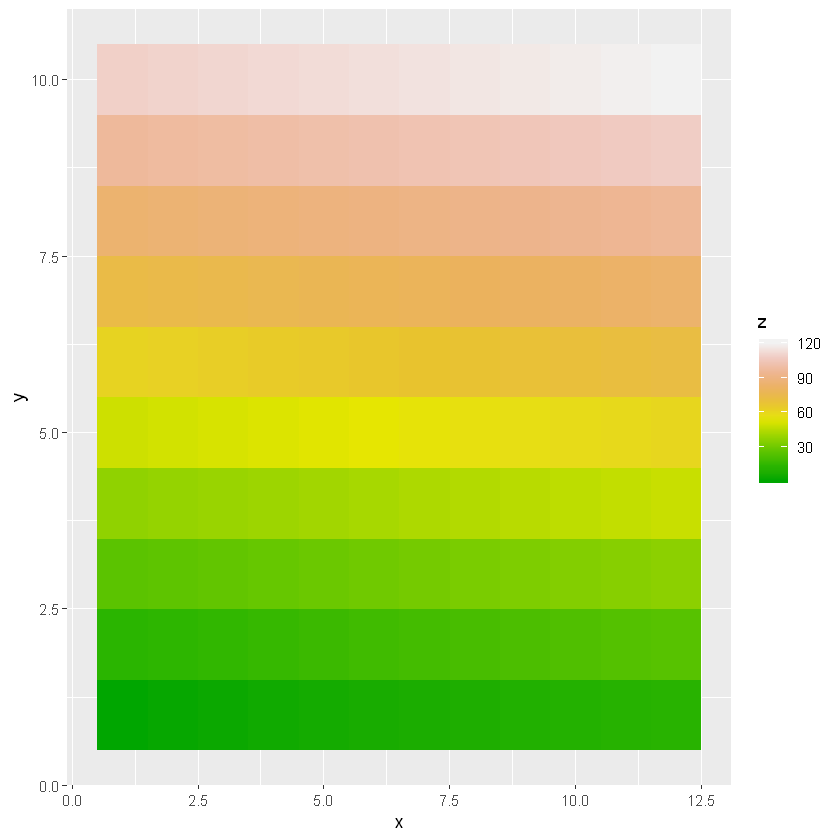

In [74]:
# Images
x <- expand.grid(x = 1:12, y = 1:10) %>% 
  mutate(z = 1:120) 
x %>% ggplot(aes(x, y, fill = z)) + 
  geom_raster() + 
  scale_fill_gradientn(colors =  terrain.colors(10))

# Quick Plots

In [75]:
x <- heights %>% 
  filter(sex=="Male") %>% 
  pull(height)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


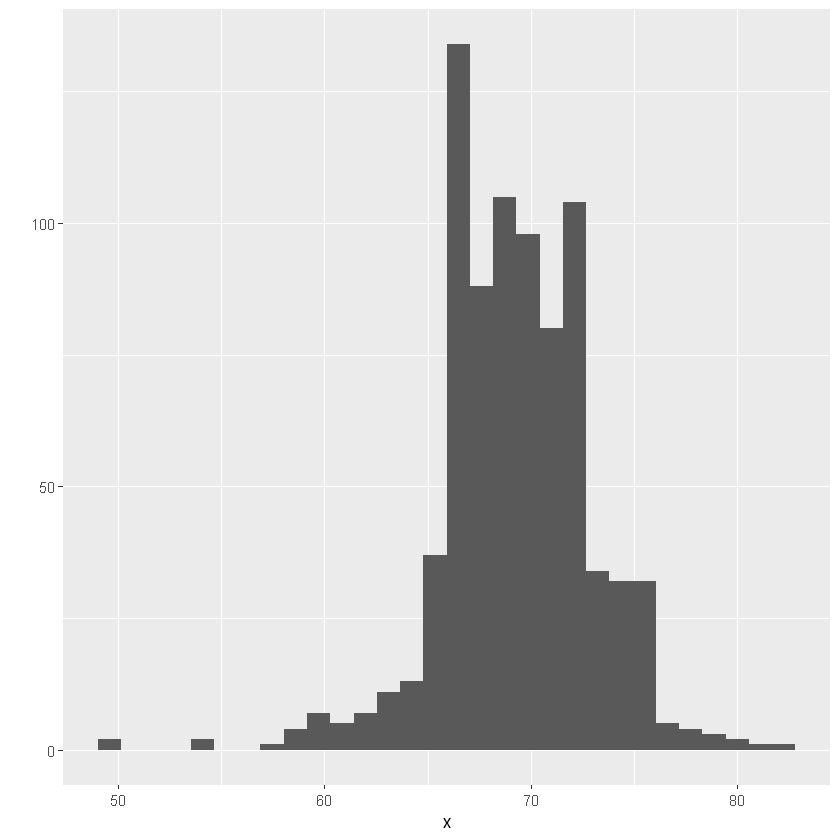

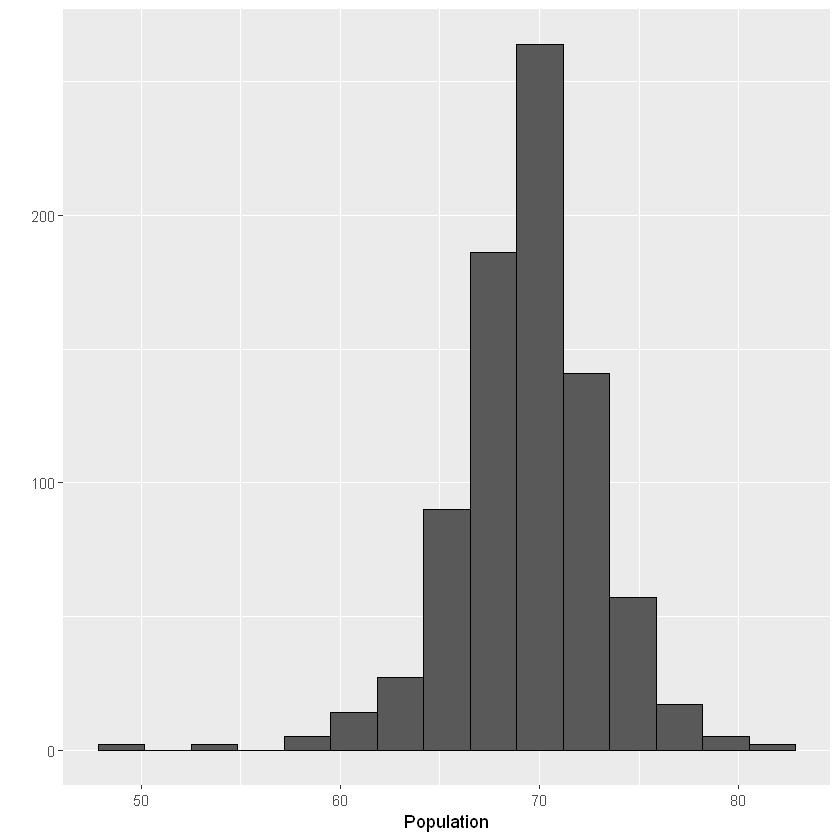

In [84]:
# histogram
qplot(x)
# better
qplot(x, bins=15, color = I("black"), xlab = "Population")


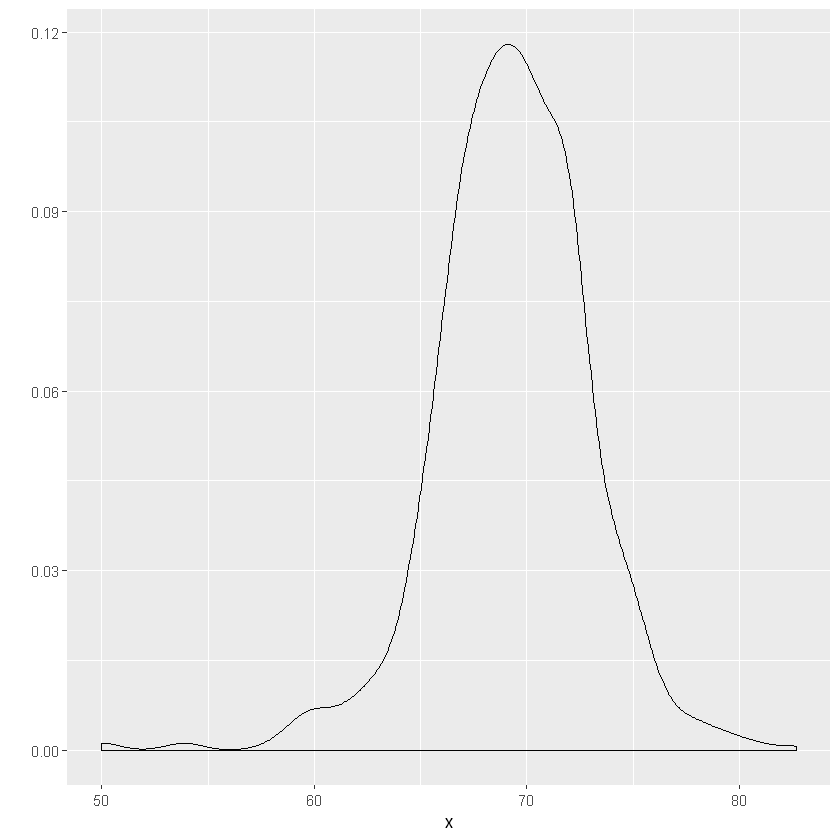

In [83]:
# density plot
qplot(x, geom = "density")

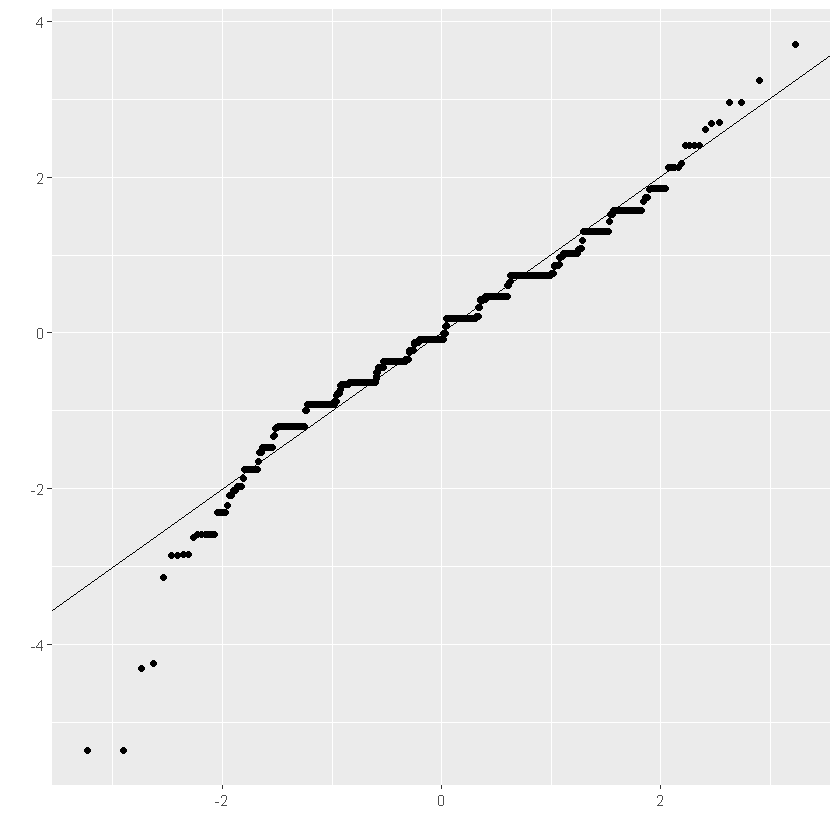

In [77]:
# qq-plot
qplot(sample = scale(x)) + geom_abline()

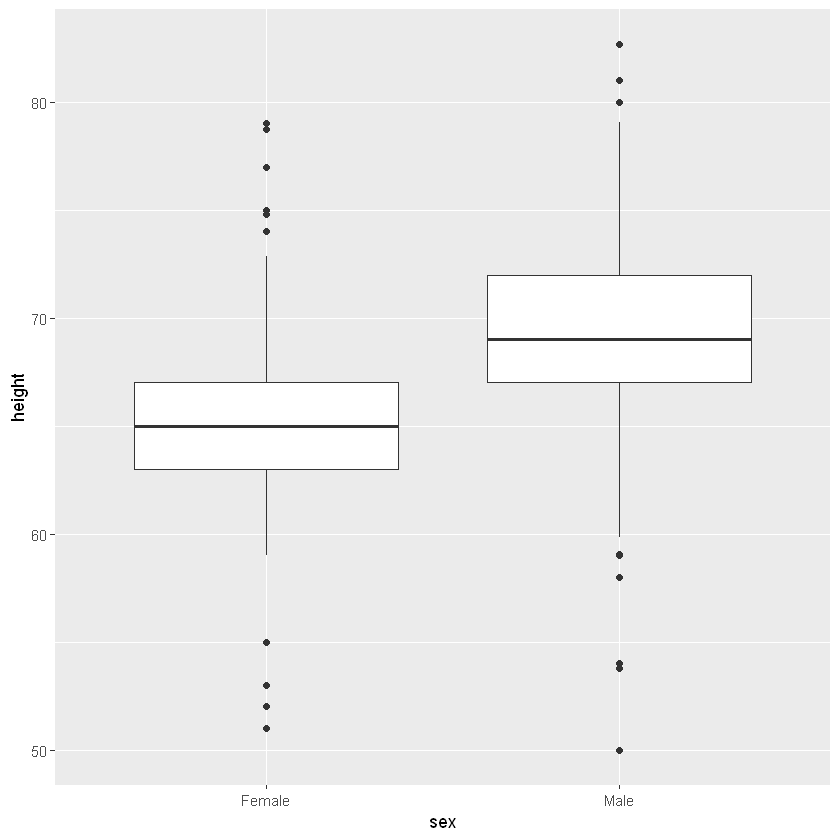

In [82]:
# If we supply a factor and a numeric vector, we obtain a plot like the one below
heights %>% qplot(sex, height, data = ., geom = "boxplot")